In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Activation
from keras.layers import Conv2D, MaxPooling2D,TimeDistributed, Concatenate, Conv3D, MaxPooling3D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import cv2
import os

## Creating the numpy data from the .avi videos

In [ ]:
# load the .avi file

boxing_avi_list = []
handclapping_avi_list = []
handwaving_avi_list = []

# load the .avi file in the boxing folder
for filename in os.listdir('boxing'):
    boxing_avi_list.append(cv2.VideoCapture('boxing/'+filename))

# load the .avi file in the handclapping folder
for filename in os.listdir('handclapping'):
    handclapping_avi_list.append(cv2.VideoCapture('handclapping/'+filename))

# load the .avi file in the handwaving folder
for filename in os.listdir('handwaving'):
    handwaving_avi_list.append(cv2.VideoCapture('handwaving/'+filename))

print('boxing_avi_list length: ', len(boxing_avi_list))
print('handclapping_avi_list length: ', len(handclapping_avi_list))
print('handwaving_avi_list length: ', len(handwaving_avi_list))

shortest_boxing_video = int(min([avi.get(cv2.CAP_PROP_FRAME_COUNT) for avi in boxing_avi_list]))
shortest_handclapping_video = int(min([avi.get(cv2.CAP_PROP_FRAME_COUNT) for avi in handclapping_avi_list]))
shortest_handwaving_video = int(min([avi.get(cv2.CAP_PROP_FRAME_COUNT) for avi in handwaving_avi_list]))

print("\nshortest boxing video: ", shortest_boxing_video)
print("shortest handclapping video: ", shortest_handclapping_video)
print("shortest handwaving video: ", shortest_handwaving_video)

In [ ]:
# convert the .avi file to .numpy array as grayscale frames
def avi2np(avi):
    
    frames = []
    while True:
        ret, frame = avi.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame)

    return np.array(frames)

In [ ]:
frames_per_video = 20

# for each video take 10 frames randomly
boxing = np.array([avi2np(avi)[:frames_per_video] for avi in boxing_avi_list])
handclapping = np.array([avi2np(avi)[:frames_per_video] for avi in handclapping_avi_list])
handwaving = np.array([avi2np(avi)[:frames_per_video] for avi in handwaving_avi_list])

print("boxing shape: ", boxing.shape)
print("handclapping shape: ", handclapping.shape)
print("handwaving shape: ", handwaving.shape)

boxing shape:  (0,)
handclapping shape:  (0,)
handwaving shape:  (0,)


In [ ]:
# Save the numpy array
#np.save('boxing.npy', boxing)
#np.save('handclapping.npy', handclapping)
#np.save('handwaving.npy', handwaving)

## Loading the data, and formatting

In [ ]:
# Load the numpy array

boxing = np.load('boxing.npy')
handclapping = np.load('handclapping.npy')
handwaving = np.load('handwaving.npy')

print("boxing shape: ", boxing.shape)
print("handclapping shape: ", handclapping.shape)
print("handwaving shape: ", handwaving.shape)

boxing shape:  (100, 20, 120, 160)
handclapping shape:  (99, 20, 120, 160)
handwaving shape:  (100, 20, 120, 160)


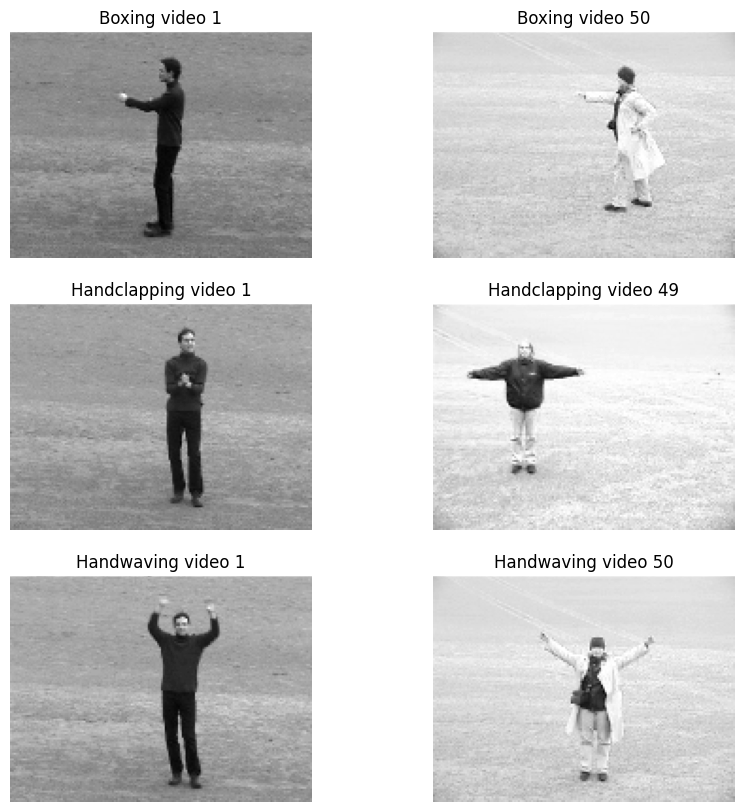

In [ ]:
# Display 2 frames from a video clips from each class.
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.imshow(boxing[0][10], cmap='gray')
plt.title('Boxing video 1')
plt.axis('off')
plt.subplot(3, 2, 2)
plt.imshow(boxing[int(len(boxing)/2)][10], cmap='gray')
plt.title('Boxing video ' + str(int(len(boxing)/2)))
plt.axis('off')
plt.subplot(3, 2, 3)
plt.imshow(handclapping[0][10], cmap='gray')
plt.title('Handclapping video 1')
plt.axis('off')
plt.subplot(3, 2, 4)
plt.imshow(handclapping[int(len(handclapping)/2)][10], cmap='gray')
plt.title('Handclapping video ' + str(int(len(handclapping)/2)))
plt.axis('off')
plt.subplot(3, 2, 5)
plt.imshow(handwaving[0][10], cmap='gray')
plt.title('Handwaving video 1')
plt.axis('off')
plt.subplot(3, 2, 6)
plt.imshow(handwaving[int(len(handwaving)/2)][10], cmap='gray')
plt.title('Handwaving video ' + str(int(len(handwaving)/2)))
plt.axis('off')
plt.show()


In [ ]:
# generate x-frame samples

def generate_x_frame_samples(data, frames_per_video):
    
    x_frame_samples = []
    for i in range(len(data)):
        for j in range(len(data[i]) - frames_per_video + 1):
            x_frame_samples.append(data[i][j:j+frames_per_video])
    return np.array(x_frame_samples)

In [ ]:
#number of frame selection and using generate x-frame samples
nb_x_frames = 2

boxing_x_frame_samples = generate_x_frame_samples(boxing, nb_x_frames)
print("boxing_x_frame_samples shape: ", boxing_x_frame_samples.shape)

handclapping_x_frame_samples = generate_x_frame_samples(handclapping, nb_x_frames)
print("handclapping_x_frame_samples shape: ", handclapping_x_frame_samples.shape)

handwaving_x_frame_samples = generate_x_frame_samples(handwaving, nb_x_frames)
print("handwaving_x_frame_samples shape: ", handwaving_x_frame_samples.shape)

boxing_x_frame_samples shape:  (1900, 2, 120, 160)
handclapping_x_frame_samples shape:  (1881, 2, 120, 160)
handwaving_x_frame_samples shape:  (1900, 2, 120, 160)


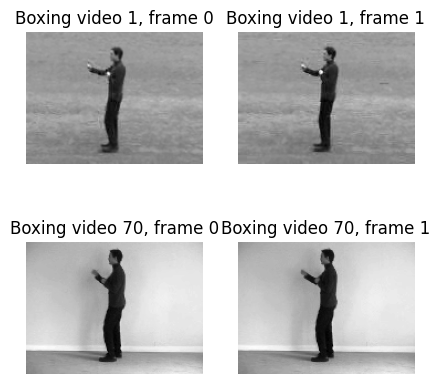

In [ ]:
# Display the first 2 frames of the first 2 boxing_x_frame_samples
plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.imshow(boxing_x_frame_samples[2][0], cmap='gray')
plt.title('Boxing video 1, frame 0')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(boxing_x_frame_samples[2][1], cmap='gray')
plt.title('Boxing video 1, frame 1')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(boxing_x_frame_samples[70][0], cmap='gray')
plt.title('Boxing video 70, frame 0')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(boxing_x_frame_samples[70][1], cmap='gray')
plt.title('Boxing video 70, frame 1')
plt.axis('off')
plt.show()

## Splitting the data into training and testing

In [ ]:
#split train and test sets according to the desired ratio. This function helps us to make sure that we do not have the same data in train set and test set.


def split_train_test(data, train_test_ratio):
    train_size = int(len(data) * train_test_ratio)
    return data[:train_size], data[train_size:]

def create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio):
    train_boxing, test_boxing = split_train_test(boxing_x_frame_samples, train_test_ratio)
    train_handclapping, test_handclapping = split_train_test(handclapping_x_frame_samples, train_test_ratio)
    train_handwaving, test_handwaving = split_train_test(handwaving_x_frame_samples, train_test_ratio)

    X_train = np.concatenate((train_boxing, train_handclapping, train_handwaving))
    X_test = np.concatenate((test_boxing, test_handclapping, test_handwaving))

    y_train = np.array([0]*len(train_boxing) + [1]*len(train_handclapping) + [2]*len(train_handwaving))
    y_test = np.array([0]*len(test_boxing) + [1]*len(test_handclapping) + [2]*len(test_handwaving))

    # add an extra dimension for the grayscale channel
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)

    # Shuffle the data
    idx = np.random.permutation(len(X_train))
    X_train, y_train = X_train[idx], y_train[idx]

    return X_train, X_test, y_train, y_test

train_test_ratio = 0.9


X_train, X_test, y_train, y_test = create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio)

print("\nX_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (5112, 2, 120, 160, 1)
X_test shape:  (569, 2, 120, 160, 1)
y_train shape:  (5112,)
y_test shape:  (569,)


## Creating the model for question 2

In [ ]:
optimizer_type = Adam(learning_rate=5e-5)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.5  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 100  # maxmimum number of epochs to be iterated
batch_size = 50   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 32 # number of nodes in hidden fully connected layer
num_back_nodes = 32

nb_classes = 3

In [ ]:
#neural network model
def conv_layer(input, filters=4, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'):
    conv = TimeDistributed( Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation='relu') )(input) 
    return TimeDistributed( Activation(activation) )(conv)

In [ ]:
#model structure for a 3 convolutional layers and one fully connected layer

input_shape = (2, 120, 160, 1)
inputs = Input(shape=input_shape)

conv1 = conv_layer(inputs, filters=4)
pool1 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv1)   # maxpool downsampled to 60x80x4

conv2 = conv_layer(pool1, filters=8)
pool2 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv2)   # maxpool downsampled to 30x40x8

conv3 = conv_layer(pool2, filters=16)
pool3 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv3)   # maxpool downsampled to 15x20x16

flatten = TimeDistributed( Flatten() )(pool3)   

dense_01 = TimeDistributed(Dropout(dropout_ratio))(flatten)
dense_01 = TimeDistributed(Dense(num_hidden_nodes))(dense_01)
dense_01 = TimeDistributed(Activation('sigmoid'))(dense_01)

concat= Concatenate(axis=1)([ dense_01[:,0,:],dense_01[:,1,:] ])

dense_02 = Dense(nb_classes)(concat)
outputs = Activation('softmax')(dense_02)


* Compiling the network model *

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2, 120, 160  0           []                               
                                , 1)]                                                             
                                                                                                  
 time_distributed_20 (TimeDistr  (None, 2, 120, 160,  40         ['input_2[0][0]']                
 ibuted)                         4)                                                               
                                                                                                  
 time_distributed_21 (TimeDistr  (None, 2, 120, 160,  0          ['time_distributed_20[0][0]']    
 ibuted)                         4)                       

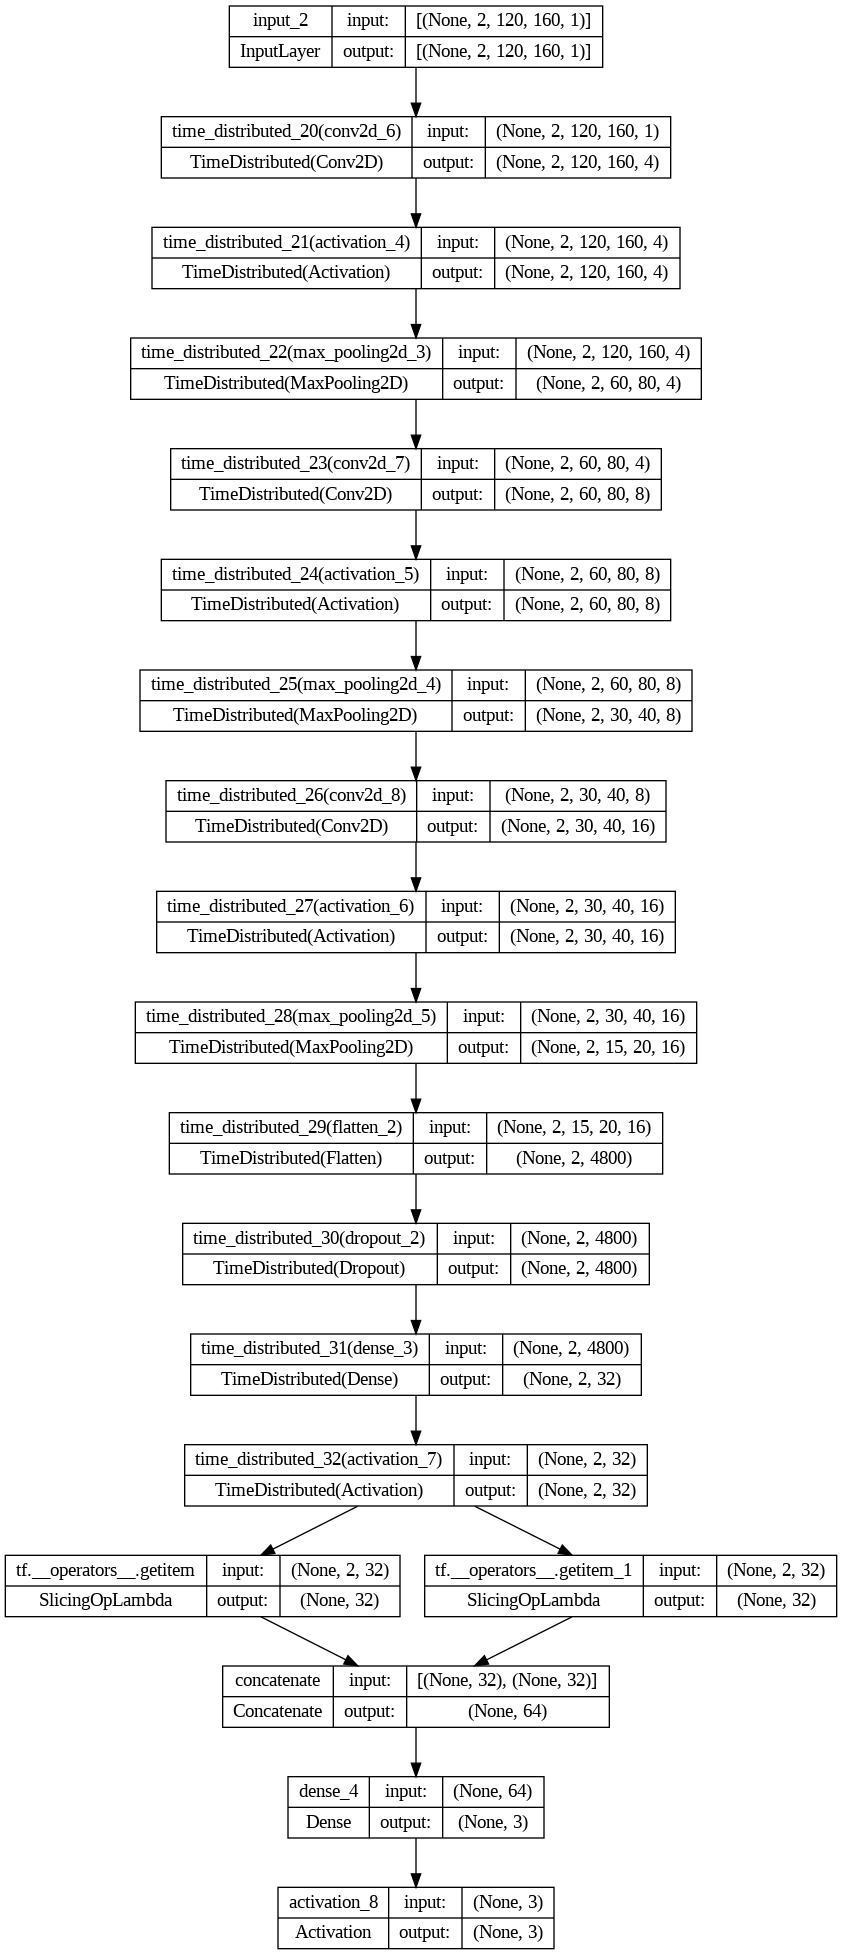

In [ ]:
print()
print('* Compiling the network model *')
print()

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

## Training the model 5 times

In [ ]:
# Train your network from scratch at least 5 times and report the average and standard deviation of your test accuracies

evaluated_models = []

def reset_model(model):

    model2 = tf.keras.models.clone_model(model)
    model2.set_weights(model.get_weights())

    return model2

for i in range(5):
    print('Training iteration: ', i+1)
    print()

    model_copy = reset_model(model)
    model_copy.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    history = model_copy.fit(X_train, tf.keras.utils.to_categorical(y_train, nb_classes), batch_size=batch_size, epochs=max_epochs, validation_split=validtrain_split_ratio, shuffle=batch_shuffle)
    print()
    print('Training accuracy: ', history.history['categorical_accuracy'][-1])
    print('Validation accuracy: ', history.history['val_categorical_accuracy'][-1])
    print('Test accuracy: ', model_copy.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes))[1])
    print()
    evaluated_models.append(model_copy.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes)))


Training iteration:  1

Epoch 1/100
82/82 [==============================] - 2s 21ms/step - loss: 1.1599 - categorical_accuracy: 0.3387 - val_loss: 1.0877 - val_categorical_accuracy: 0.3744
Epoch 2/100
82/82 [==============================] - 1s 16ms/step - loss: 1.1256 - categorical_accuracy: 0.3541 - val_loss: 1.0923 - val_categorical_accuracy: 0.3490
Epoch 3/100
82/82 [==============================] - 1s 17ms/step - loss: 1.1215 - categorical_accuracy: 0.3441 - val_loss: 1.0867 - val_categorical_accuracy: 0.4203
Epoch 4/100
82/82 [==============================] - 1s 17ms/step - loss: 1.1011 - categorical_accuracy: 0.3769 - val_loss: 1.0899 - val_categorical_accuracy: 0.3451
Epoch 5/100
82/82 [==============================] - 1s 16ms/step - loss: 1.0980 - categorical_accuracy: 0.3685 - val_loss: 1.0810 - val_categorical_accuracy: 0.3715
Epoch 6/100
82/82 [==============================] - 1s 17ms/step - loss: 1.0882 - categorical_accuracy: 0.3906 - val_loss: 1.0842 - val_categoric

In [ ]:
#Averaging the test accuracy after 5 times training
print('Average test accuracy: ', np.mean([i[1] for i in evaluated_models]))
print('Standard deviation of test accuracy: ', np.std([i[1] for i in evaluated_models]))

Average test accuracy:  0.6931458711624146
Standard deviation of test accuracy:  0.010223588894120648


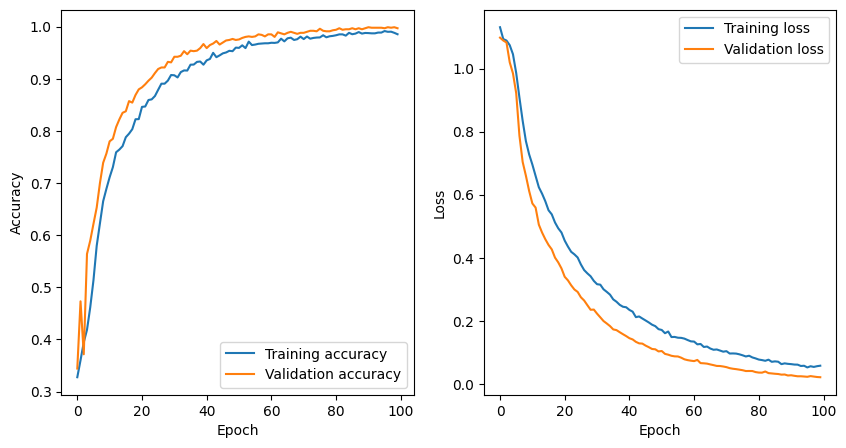

In [ ]:
#Visualizing the data of accuracy and loss function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


18/18 [==============================] - 0s 5ms/step
[[0.57894737 0.08421053 0.33684211]
 [0.         0.73544974 0.26455026]
 [0.00526316 0.22631579 0.76842105]]


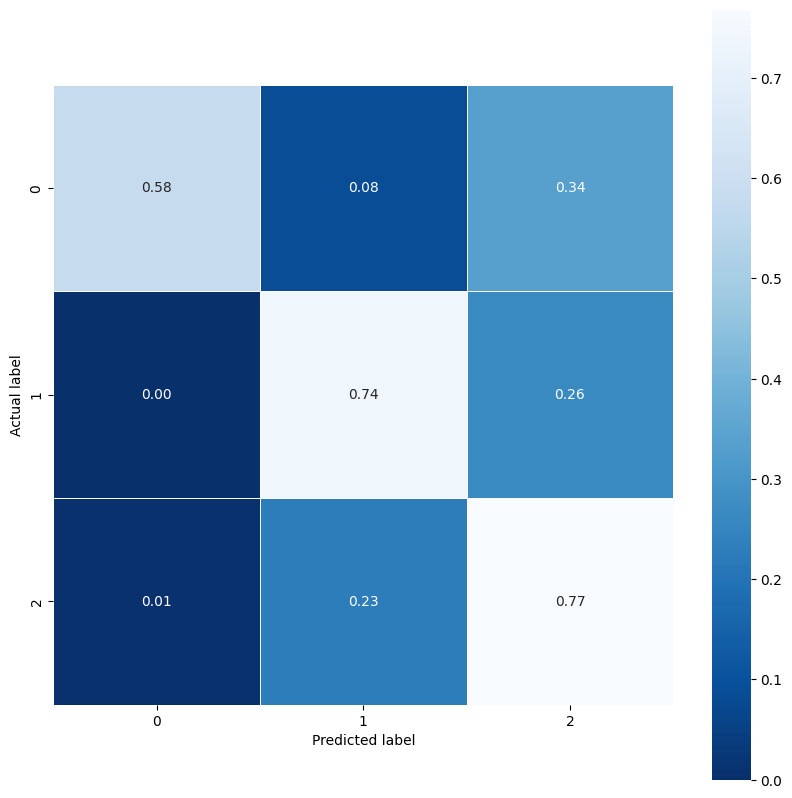

In [ ]:
# Print the confusion matrix for the last model

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_copy.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(tf.keras.utils.to_categorical(y_test, nb_classes), axis=1)

cm = confusion_matrix(y_test, y_pred)
# make cm data as percentage
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

# Plot the confusion matrix for the last model

plt.figure(figsize=(10, 10))

sns.heatmap(cm, annot=True, fmt='.2f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


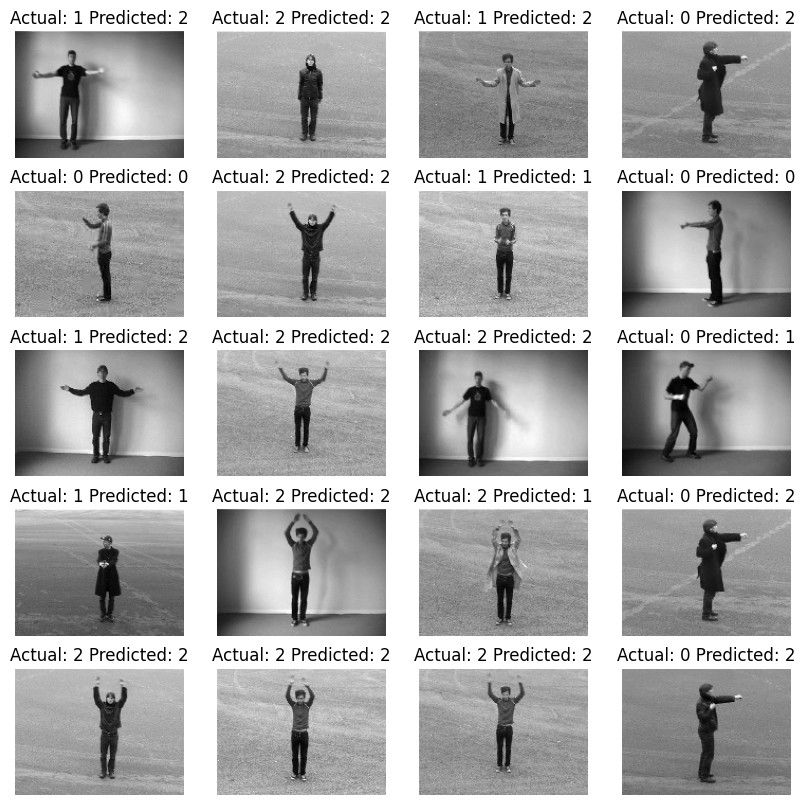

In [ ]:
# Display the test images with the predicted and actual labels - Boxing: 0 , Hand clapping : 1, Hand waving: 2

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
name_dict = {0: 'boxing', 1: 'handclapping', 2: 'handwaving'}

for i in range(20):
    plt.subplot(5, 4, i+1)
    rand = np.random.randint(0, len(X_test))
    plt.imshow(X_test[rand, 0, :, :, 0], cmap='gray')
    plt.title('Actual: ' + str(y_test[rand]) + ' Predicted: ' + str(y_pred[rand]))
    plt.axis('off')

plt.show()

With an accuracy of 69% the model can detect the boxing, hand waving and hand clapping.This accuracy can be improved considering that the detection is not good at the moment.

## Improving the model for question 3

To improve the model accuracy we intend to use two solution: 

1. Using 5 frames instead of 2 frames in previous question, this allows us to train more movement by the data
2. To add Conv3D layers in the intermediate layers of the model. This 3D convolution can detect movement trends between the frames. Therefore it can improve the accuracy of the model.
3. Using batch normalisation in the intermediate layers, this helps us reduce overfitting and improve the accuracy of the model.

In [ ]:
#Choosing 5 frames instead of 2 to train model with higher accuracy 
nb_x_frames_q3 = 5

boxing_x_frame_samples = generate_x_frame_samples(boxing, nb_x_frames_q3)
print("boxing_x_frame_samples shape: ", boxing_x_frame_samples.shape)

handclapping_x_frame_samples = generate_x_frame_samples(handclapping, nb_x_frames_q3)
print("handclapping_x_frame_samples shape: ", handclapping_x_frame_samples.shape)

handwaving_x_frame_samples = generate_x_frame_samples(handwaving, nb_x_frames_q3)
print("handwaving_x_frame_samples shape: ", handwaving_x_frame_samples.shape)

boxing_x_frame_samples shape:  (1600, 5, 120, 160)
handclapping_x_frame_samples shape:  (1584, 5, 120, 160)
handwaving_x_frame_samples shape:  (1600, 5, 120, 160)


In [ ]:
#Divide the train and test set using desired ratio
train_test_ratio = 0.9

X_train, X_test, y_train, y_test = create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio)

print("\nX_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (4305, 5, 120, 160, 1)
X_test shape:  (479, 5, 120, 160, 1)
y_train shape:  (4305,)
y_test shape:  (479,)


In [ ]:
#New model is composed of Conv2D, Conv3D and a fully connected layers. We also use the Batch Normalization to normalize the data in the intermediate layers
def create_model():
    input_shape = (nb_x_frames_q3, 120, 160, 1)

    inputs = Input(shape=input_shape)

    # Add convolutional layers
    conv2d1 = TimeDistributed(Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), padding='same'))(inputs)
    conv2d1 = TimeDistributed(Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), padding='same'))(conv2d1)

    conv2d1 = TimeDistributed(Activation('relu'))(conv2d1)
    conv2d1 = TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2)))(conv2d1)

    print("cov2d1 shape : ", conv2d1.shape)

    conv2d1 = TimeDistributed(BatchNormalization())(conv2d1)

    conv2d2 = TimeDistributed(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same'))(conv2d1)
    conv2d2 = TimeDistributed(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same'))(conv2d1)
    conv2d2 = TimeDistributed(Activation('relu'))(conv2d2)
    conv2d2 = TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2)))(conv2d2)

    print("cov2d2 shape : ", conv2d2.shape)

    conv2d2 = TimeDistributed(BatchNormalization())(conv2d2)

    conv3d1 = Conv3D(filters=4, kernel_size=(2, 3, 3), padding="same")(conv2d2)
    conv3d1 = Conv3D(filters=4, kernel_size=(2, 3, 3), padding="same")(conv3d1)
    conv3d1 = Activation('relu')(conv3d1)
    conv3d1 = MaxPooling3D(pool_size=(2, 2, 2))(conv3d1)

    print("cov3d1 shape : ", conv3d1.shape)

    conv3d1 = TimeDistributed(BatchNormalization())(conv3d1)
    
    conv2d3 = TimeDistributed(Conv2D(64, kernel_size=(3, 3), activation='relu'))(conv3d1)
    conv2d3 = TimeDistributed(Conv2D(64, kernel_size=(3, 3), activation='relu'))(conv3d1)
    conv2d3 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv2d3)

    print("cov2d3 shape : ", conv2d3.shape)

    conv3d2 = Conv3D(16, kernel_size=(2, 2, 2), activation='relu')(conv2d3)
    conv3d2 = Conv3D(16, kernel_size=(2, 2, 2), activation='relu')(conv2d3)
    conv3d2 = MaxPooling3D(pool_size=(1, 2, 2))(conv3d2)

    conv3d2 = TimeDistributed(BatchNormalization())(conv3d2)

    print("cov3d2 shape : ", conv3d2.shape)

    # Flatten the feature maps
    flatten = TimeDistributed(Flatten())(conv3d2)

    print("flatten shape : ", flatten.shape)

    # Add dense layers
    hidden1 = TimeDistributed(Dense(128, activation='relu'))(flatten)
    hidden1 = TimeDistributed(Dropout(0.5))(hidden1)
    hidden2 = TimeDistributed(Dense(32, activation='relu'))(hidden1)
    hidden2 = TimeDistributed(Dropout(0.3))(hidden2)

    print("hidden2 shape : ", hidden2.shape)

    output = Dense(3)(hidden2)
    output = Activation('softmax')(output)
    output = Flatten()(output)

    model = Model(inputs, output)

    return model

In [ ]:
optimizer_type = Adam(learning_rate=5e-5)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.5  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 100  # maxmimum number of epochs to be iterated
batch_size = 50   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 32 # number of nodes in hidden fully connected layer
num_back_nodes = 32

nb_classes = 3


* Compiling the network model *

cov2d1 shape :  (None, 5, 60, 80, 4)
cov2d2 shape :  (None, 5, 30, 40, 8)
cov3d1 shape :  (None, 2, 15, 20, 4)
cov2d3 shape :  (None, 2, 6, 9, 64)
cov3d2 shape :  (None, 1, 2, 4, 16)
flatten shape :  (None, 1, 128)
hidden2 shape :  (None, 1, 32)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 120, 160, 1)]  0         
                                                                 
 time_distributed_33 (TimeDi  (None, 5, 120, 160, 4)   40        
 stributed)                                                      
                                                                 
 time_distributed_34 (TimeDi  (None, 5, 120, 160, 4)   148       
 stributed)                                                      
                                                                 
 time_distributed_35 (TimeDi  (None, 5, 120

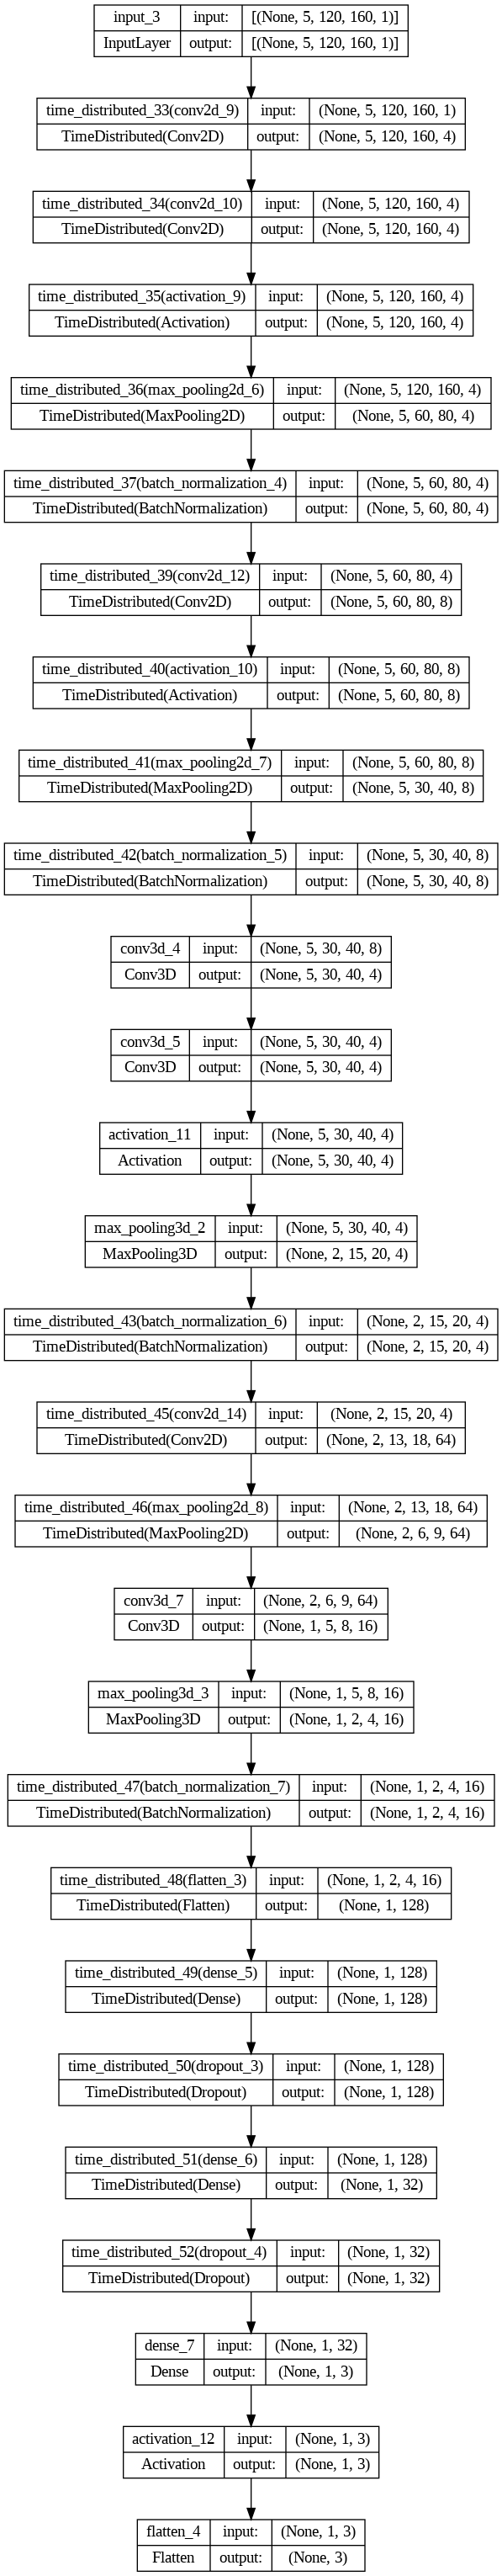

In [ ]:
print()
print('* Compiling the network model *')
print()

model2 = create_model()  # create the model
model2.compile(loss=loss, optimizer=optimizer_type, metrics=metrics)  # compile the model

# display a summary of the compiled neural network

print(model2.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

In [ ]:
# Train your network from scratch at least 5 times and report the average and standard deviation of your test accuracies

evaluated_models2 = []

def reset_model2(model):
    del model
    tf.keras.backend.clear_session()
    model2 = create_model()
    model2.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    return model2

for i in range(5):
    print('Training iteration: ', i+1)
    print()

    model_copy2 = reset_model2(model2)
    
    history = model_copy2.fit(X_train, tf.keras.utils.to_categorical(y_train, nb_classes), batch_size=batch_size, epochs=max_epochs, validation_split=validtrain_split_ratio, shuffle=batch_shuffle)
    
    evaluated_models2.append(model_copy2.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes)))

    print()
    print('Training accuracy: ', history.history['categorical_accuracy'][-1])
    print('Validation accuracy: ', history.history['val_categorical_accuracy'][-1])
    print('Test accuracy: ', model_copy2.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes))[1])
    print()


Training iteration:  1

cov2d1 shape :  (None, 5, 60, 80, 4)
cov2d2 shape :  (None, 5, 30, 40, 8)
cov3d1 shape :  (None, 2, 15, 20, 4)
cov2d3 shape :  (None, 2, 6, 9, 64)
cov3d2 shape :  (None, 1, 2, 4, 16)
flatten shape :  (None, 1, 128)
hidden2 shape :  (None, 1, 32)
Epoch 1/100
69/69 [==============================] - 7s 80ms/step - loss: 1.2171 - categorical_accuracy: 0.3595 - val_loss: 1.0901 - val_categorical_accuracy: 0.4448
Epoch 2/100
69/69 [==============================] - 5s 68ms/step - loss: 1.0907 - categorical_accuracy: 0.4352 - val_loss: 1.0603 - val_categorical_accuracy: 0.5470
Epoch 3/100
69/69 [==============================] - 5s 68ms/step - loss: 1.0211 - categorical_accuracy: 0.4776 - val_loss: 1.0086 - val_categorical_accuracy: 0.5889
Epoch 4/100
69/69 [==============================] - 5s 67ms/step - loss: 0.9806 - categorical_accuracy: 0.5017 - val_loss: 0.9492 - val_categorical_accuracy: 0.6179
Epoch 5/100
69/69 [==============================] - 5s 69ms/step 

In [ ]:
#showing the average of the test set accuracy
print('Average test accuracy: ', np.mean([i[1] for i in evaluated_models2]))
print('Standard deviation of test accuracy: ', np.std([i[1] for i in evaluated_models2]))

Average test accuracy:  0.7590814232826233
Standard deviation of test accuracy:  0.03612594645550943


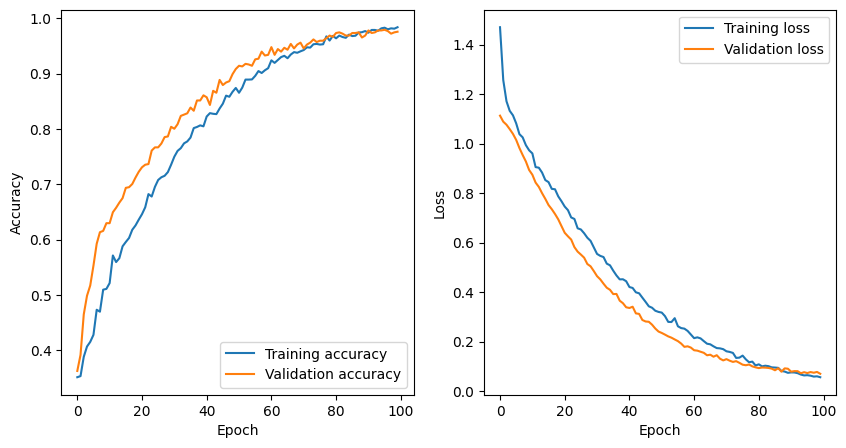

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 [==============================] - 0s 13ms/step
[[0.86875    0.1        0.03125   ]
 [0.11949686 0.82389937 0.05660377]
 [0.0375     0.175      0.7875    ]]


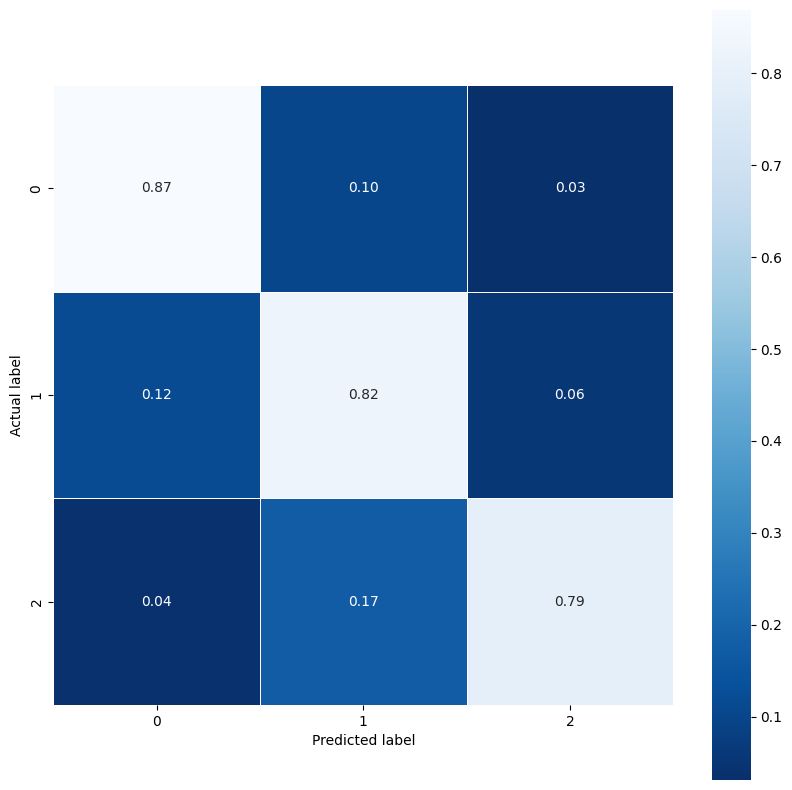

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_copy2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(tf.keras.utils.to_categorical(y_test, nb_classes), axis=1)

cm = confusion_matrix(y_test, y_pred)
# make cm data as percentage
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

# Plot the confusion matrix for the last model

plt.figure(figsize=(10, 10))

sns.heatmap(cm, annot=True, fmt='.2f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()